<div style="text-align: right"> 24.01.2020</div>

***Name:*** 

# Hausaufgabe Blatt 11

## Kinetische Gastheorie: Maxwell-Boltzmann-Verteilung

In dieser Aufgabe werden wir uns mit der kinetischen Gastheorie und der Maxwell-Boltzmann-Verteilung beschäftigen. Die genaue Herleitung der Maxwell-Boltzmann-Verteilung können Sie Kapitel 7.3.5 "Experimentalphysik I" von W. Demtröder entnehmen. 

Betrachtet man die Moleküle eines Gases als Teilchen, die lediglich durch elastische Stöße sowohl mit den Wänden ihrer Umgebung als auch untereinander wechselwirken, so spricht man von einem *idealen Gas*. 

## 1. Aufgabe
Misst man die Beträge der Geschwindigkeiten von einem idealen Gas, so stellt man fest, dass diese durch die Maxwell-Boltzmann-Verteilung beschrieben werden. Hier ist $v$ die Geschwindigkeit der Teilchen, $m$ die Masse der Teilchen, $T$ die Temperatur und $k_B$ die Boltzmann-Konstante 

$$\tag{1}
f\!\left(v\right)=4 \pi v^2 \cdot \left(\frac{m}{2 \pi k_B T}\right)^{3/2} \cdot \exp\left(\frac{-m v^2}{2 k_B T}\right).
$$

Diese Verteilung kann wie folgt begründet werden. Da keine Raumrichtung ausgezeichnet ist und die Teilchen ständig miteinander und ihrer Umgebung kollidieren, kann man annehmen, dass die Geschwindigkeiten für alle drei Komponenten $v_{\alpha}$, mit $\alpha = x, y,z$ zufällig verteilt sind.

Wir wollen nun diese Verteilung reproduzieren, indem wir Geschwindigkeitskomponenten $v_{\alpha}$, mit $\alpha = x, y,z$, für $N$ Teilchen zufällig aus einer Normalverteilung $\mathcal N$ mit Mittelwert gleich 0 und einer Standardabweichung von 1 ziehen
   $$\tag{2}
   v_{\alpha} = \sqrt{\frac{k_B T}{m}} \cdot \mathcal N\! \left(0,1\right).
   $$
   
Normalverteilte Zahlen mit Mittelwert gleich 0 und einer Standardabweichung von 1 können wie folgt erzeugt werden; hier werden Zufallszahlen für $N=5$ Teilchen in 3 Dimensionen erzeugt (daher (N,3)).
 ```python
import numpy as np
N = 5
gauss = np.random.normal(0,1,(N,3))
``` 

**a)** Versuchen Sie den obigen Code nachzuvollziehen. Erstellen Sie für $N=100$ Teilchen Zufallszahlen für jede Geschwindigkeitskomponente $\alpha=x, y, z$, indem Sie obigen Code und Gleichung (2) kombinieren. Nehmen Sie dabei für die Masse $m = 4.8 \cdot 10^{-3}$, für die Temperatur $T=70$ und für die Boltzmann Konstante $k_B=1.38$ an.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# benötigte Bibliotheken werden geladen und Variablen definiert.
N = 100
m = 4.8*(10)**(-3)
T = 70
k = 1.38
gv = np.random.normal(0,1,(N,3))
# nachdem die Gaussverteilung erstellt wurde, wird v in Abhängigkeit von dieser berechnet.
va = np.sqrt((k*T)/m)*gv

**b)** Berechnen Sie nun den Betrag der Geschwindigkeit $v$ aus den Geschwindigkeitskomponenten $\alpha=x,y,z$ für jede der $N=100$ erzeugten Zahlen. Benutzen Sie dafür die Normierungsfunktion `np.linalg.norm()` wie folgt: 
```python
norm = np.linalg.norm(geschwindigkeit, axis=1)
```
Das Stichwort `axis` gibt an, über welche "Dimension" des arrays der Betrag berechnet wird, also zum Beispiel über Zeilen oder Spalten.

In [4]:
norm = np.linalg.norm(va, axis=1)
#Der Betrag der Geschwindigkeiten wird auf gewünschte Weise berechnet.

**c)** Erstellen Sie ein Histogramm aus den gerade berechneten Beträgen der Geschwindigkeit $v$. Benutzen Sie dafür den Histogramm Befehl `ax.hist()` wie folgt:
``` 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(v, density=True)```

Dabei stellt das Stichwort `density=True` sicher, dass das Histogramm normiert ist. Führen Sie sinnvolle Achsenbeschriftungen ein. Kommentieren Sie jede Zeile des Codes sinnvoll.

Text(0, 0.5, 'Wahrscheinlichkeiten')

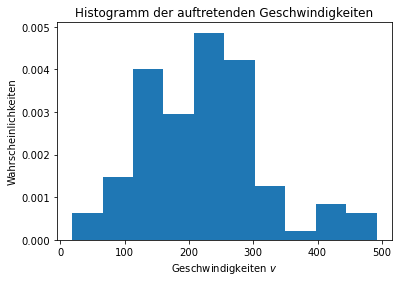

In [5]:
fig, ax = plt.subplots()
ax.hist(norm, density=True)
# Das Histogramm wird mithilfe der berechneten und normierten Geschwindigkeiten erstellt und beschriftet.
ax.set_title("Histogramm der auftretenden Geschwindigkeiten")
ax.set_xlabel("Geschwindigkeiten $v$")
ax.set_ylabel("Wahrscheinlichkeiten")

**d)** Schreiben Sie eine Funktion, die als Argument ein array von Beträgen von Geschwindigkeiten und eine Temperatur annimmt und die Maxwell-Boltzmann Verteilung (Gleichung (1)) zurückgibt. Tipp: Sie können einen Array mit Werten mit gleichem Abstand mit ```np.arange``` erzeugen. Vergleichen Sie die theoretisch erwartete Verteilung mit Ihrer erzeugten in einem gemeinsamen Plot.  Kommentieren Sie jede Zeile des Codes sinnvoll.

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495])

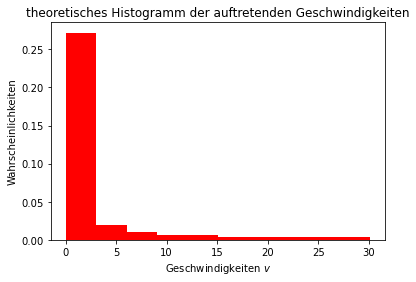

In [6]:
def maxbol(v,T):
    f = 4*np.pi*(v)**2 * (m/(2*np.pi*k*T))**(3/2)*np.exp((m*(v)**2)/(2*k*T))
    return(f)
# Die Maxwell-Boltzmann Verteilung wird als Funktion von v und T definiert
v = np.arange(0,500,5)
nv = np.linalg.norm(v, axis=0)
# mithilfe von np.arange wird ein Geschwindigkeitsarray erstellt und normiert
fig, ax = plt.subplots()
ax.hist(maxbol(v,70), density=True, color = "red")
# das theoretische Histogramm wird aufgestellt.
ax.set_title("theoretisches Histogramm der auftretenden Geschwindigkeiten")
ax.set_xlabel("Geschwindigkeiten $v$")
ax.set_ylabel("Wahrscheinlichkeiten")
# die Histogramme ähneln einander überhaupt nicht. Vermutlich ist das theoretische Histogramm falsch
v

**e)** Wiederholen Sie Aufgaben **a)**-**d)** für $N=10000$ Teilchen.  Optional können Sie auch die Temperatur auf $T=290$ ändern. 
Was stellen Sie fest?

Ich stelle fest, dass ... 
die zufällig erstellte Geschwindigkeitsverteilung der vorherigen ähnelt, aber verfeinert ist. Das theoretische Histogramm ist genauso wie vorher komplett abweichend.

(array([0.27193546, 0.01989772, 0.00994886, 0.00663257, 0.00663257,
        0.00331629, 0.00331629, 0.00331629, 0.00331629, 0.00331629]),
 array([ 0.        ,  3.01542133,  6.03084266,  9.046264  , 12.06168533,
        15.07710666, 18.09252799, 21.10794933, 24.12337066, 27.13879199,
        30.15421332]),
 <BarContainer object of 10 artists>)

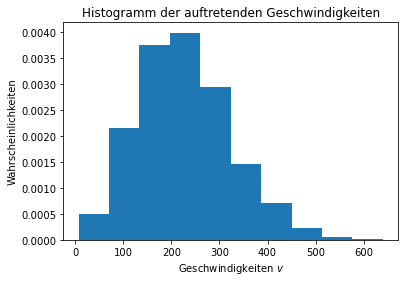

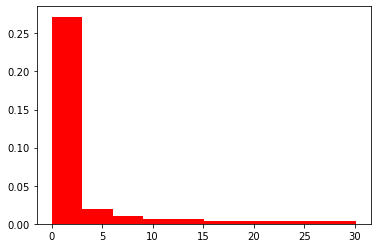

In [7]:
import numpy as np
import matplotlib.pyplot as plt
N = 10000
m = 4.8*(10)**(-3)
T = 70
k = 1.38
gv = np.random.normal(0,1,(N,3))
va = np.sqrt((k*T)/m)*gv
norm = np.linalg.norm(va, axis=1)
fig, ax = plt.subplots()
ax.hist(norm, density=True)
ax.set_title("Histogramm der auftretenden Geschwindigkeiten")
ax.set_xlabel("Geschwindigkeiten $v$")
ax.set_ylabel("Wahrscheinlichkeiten")
def maxbol(v,T):
    f = 4*np.pi*(v)**2 * (m/(2*np.pi*k*T))**(3/2)*np.exp((m*(v)**2)/(2*k*T))
    return(f)
v = np.arange(0,500,5)
nv = np.linalg.norm(v, axis=0)
fig, ax = plt.subplots()
ax.hist(maxbol(v,70), density=True, color = "red")